In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Simple Distance Caculator
def s_dist(a, b, ax=1):
    return np.linalg.norm(a-b)

def dupl(S, Point):
    for i in range(len(S)):
        #print(Point.get_x(), " = ", S[i][0])
        if Point.get_x() == S[i][0] and Point.get_y() == S[i][1]:
            return 1
    return 0
def duplp(p1, p2):
    if p1[0] == p2[0] and p1[1] == p2[1]:
        return 1
    else: 
        return 0
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def get(self):
    return [self.x, self.y]
  def get_x(self):
    return self.x
  def get_y(self):
    return self.y

class Edge:
  def __init__(self, start, end, seqence):
    self.start = start
    self.end = end
    self.seqence = seqence
  def get(self):
    return [self.start, self.end]
  def getSeq(self):
    return self.seqence
  def dist(self):
    return s_dist(self.get()[0], self.get()[1])
  def getALL(self):
    return [self.start, self.end, self.seqence]
  def getALLLoc(self):
    return [self.seqence, s_dist(self.start, self.end)]

In [2]:
# Importing the dataset
data = pd.read_csv('xclara_min.csv')

f1 = data['V1'].values 
f2 = data['V2'].values

S = []
X = []
edges = []

X = np.array(list(zip(f1, f2))) 
#plt.scatter(f1, f2, c='black', s=7) 
moda = len(X) % 2 
min = Edge(np.array([0, 0]), np.array([50,50]), 1)  #random value
#print(X)

In [3]:
tempv = []
for j in range(len(X)): 
    for k in range(len(X)): 
        attempt = Edge(X[j], X[k], 0) 
        if min.dist() > attempt.dist() and duplp(X[j], X[k]) == 0: 
            min = attempt
            tempv = [j, k]
edges.append(min)
S.append(min.get()[0])
S.append(min.get()[1])
X = np.delete(X, tempv, axis = 0)
#print(X)

In [4]:
pltEdgesX = []
pltEdgesY = []

for i in range(len(edges)):
    pltEdgesX.append(edges[i].get()[0][0])
    pltEdgesX.append(edges[i].get()[1][0])
    pltEdgesY.append(edges[i].get()[0][1])
    pltEdgesY.append(edges[i].get()[1][1])

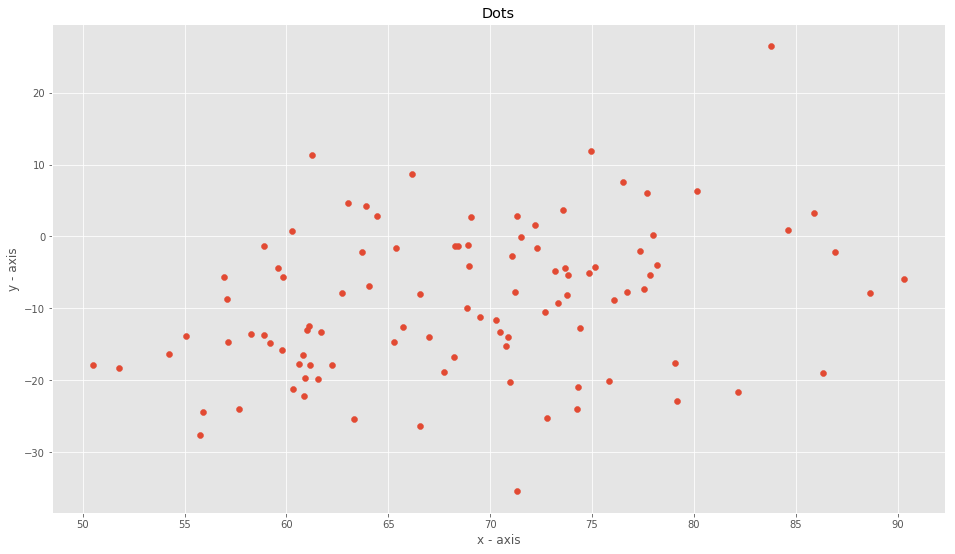

In [5]:
#VgetPX
# plotting the points 
plt.plot(pltEdgesX, pltEdgesY) 
plt.scatter(f1, f2)
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Dots') 
  
# function to show the plot 
plt.show() 

In [6]:
seq = 1
size = len(X)
def validate(el):
    for i in range(len(S)):
        #print(S[i], " ss ", el[0])
        if S[i][0] == el[0] and S[i][1] == el[1]:
            return 1
    return 0

while size > moda:
    tempv = 0
    min = Edge(X[0], np.array((59,50)), seq)  #random value
    for n in range(len(S)):
        for j in range(len(X)): 
            #print(S)
            #print(X[j], " && ", validate(X[j]))
            if validate(X[j]) != 1:
                attempt = Edge(S[n], X[j], seq) 
                if min.dist() > attempt.dist():
                    min = attempt
                    tempv = j
    if validate(X[tempv]) != 1:                
        edges.append(min)
        S.append(min.get()[1])
        seq = seq + 1
        size = size - 1
#print(X)


In [7]:
pltEdgesX = []
pltEdgesY = []

for i in range(len(edges)):
    pltEdgesX.append([edges[i].get()[0][0], edges[i].get()[1][0]])
    pltEdgesY.append([edges[i].get()[0][1], edges[i].get()[1][1]])
#print(pltEdgesX)
#print(pltEdgesY)

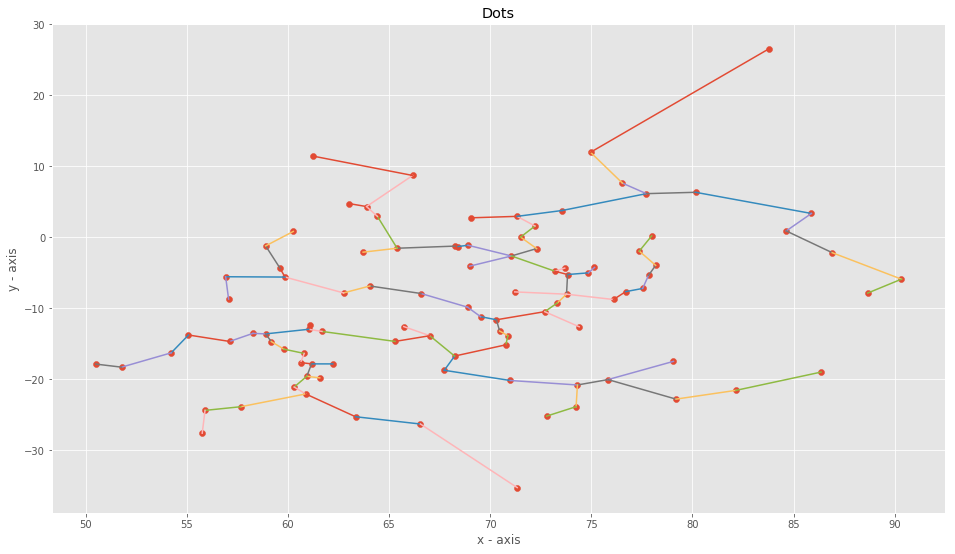

In [8]:

#VgetPX
# plotting the points 
for i in range(len(pltEdgesX)):
    plt.plot(pltEdgesX[i], pltEdgesY[i]) 
plt.scatter(f1, f2)
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Dots') 
  
# function to show the plot 
plt.show() 

In [9]:
new_edge = []
for i in range(len(edges)):
    new_edge.append([edges[i].get(), edges[i].dist(), edges[i].getSeq()])
new_edge = np.array(new_edge)
k = 3
new_edge = new_edge[new_edge[:,1].argsort()]

size = len(new_edge) - 1
indexes = []
for i in range(0, k):
    indexes.append(size)
    size -= 1
new_edge = np.delete(new_edge, indexes, axis = 0)
    
#print(new_edge)

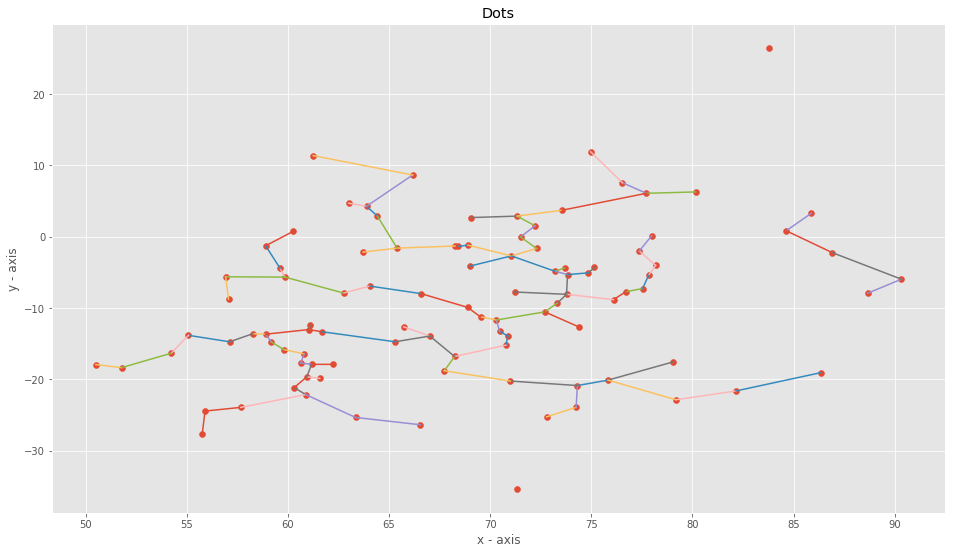

In [10]:
pltEdgesX = []
pltEdgesY = []
for i in range(len(new_edge)):
    pltEdgesX.append([new_edge[i][0][0][0], new_edge[i][0][1][0]])
    pltEdgesY.append([new_edge[i][0][0][1], new_edge[i][0][1][1]])

#VgetPX
# plotting the points 
for i in range(len(pltEdgesX)):
    plt.plot(pltEdgesX[i], pltEdgesY[i]) 
plt.scatter(f1, f2)
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Dots') 
  
# function to show the plot 
plt.show() 